In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!unzip -qq "/content/archive (1).zip"

In [3]:
# setting the path and the labels list for classification of targets on the basis in human understandable form

train_dir = os.path.join('/content/garbage classification/Garbage classification')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [4]:
train_dir

'/content/garbage classification/Garbage classification'

In [5]:
# checking the size of data available to us for training out model

for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


In [6]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# checking size of individual image

directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

# Deep Learning으로 구현


In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 382, 510, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 508, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 380, 508, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 254, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 190, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 252, 64)      1

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [11]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [12]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
64/64 [==============================] - 160s 2s/step - loss: 1.6812 - accuracy: 0.4827 - val_loss: 6.3901 - val_accuracy: 0.1909
Epoch 2/50
64/64 [==============================] - 112s 2s/step - loss: 1.2572 - accuracy: 0.5672 - val_loss: 13.7747 - val_accuracy: 0.1909
Epoch 3/50
64/64 [==============================] - 112s 2s/step - loss: 1.1952 - accuracy: 0.5776 - val_loss: 19.5622 - val_accuracy: 0.1889
Epoch 4/50
64/64 [==============================] - 112s 2s/step - loss: 1.1186 - accuracy: 0.6166 - val_loss: 26.9159 - val_accuracy: 0.2147
Epoch 5/50
64/64 [==============================] - 112s 2s/step - loss: 0.9973 - accuracy: 0.6497 - val_loss: 20.4335 - val_accuracy: 0.2744
Epoch 6/50
64/64 [==============================] - 112s 2s/step - loss: 0.9874 - accuracy: 0.6472 - val_loss: 15.1068 - val_accuracy: 0.2604
Epoch 7/50
64/64 [==============================] - 112s 2s/step - loss: 0.9400 - accuracy: 0.6635 - val_loss: 6.1662 - val_accuracy: 0.2346
Epoch 8/

Enter any category by index: 2
Enter any index to test: 4


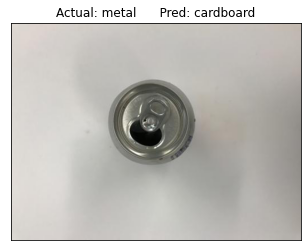

In [15]:
cat = int(input('Enter any category by index: '))
ind = int(input('Enter any index to test: '))

directory = os.path.join(train_dir, labels[cat % 6])
try:
    path = os.path.join(directory, os.listdir(directory)[ind])
    img = mpimg.imread(path)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))
    
except:
    print('Invalid Value')